# Analysis of Round 1 Data

In [1]:
#imports

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


## Get all the data in one place

For round 1 we have two sets of data the price data and the trade data

In [2]:
round_1_data_path = Path(r"/home/zr/code/trading_project/exploratory_analysis/Prosperity2Data/round-1-island-data-bottle")

# Trade data

In [3]:
days = [-2, -1, 0]

trades = {}
for day in days:
    
    trades[day]= pd.read_csv(round_1_data_path / Path(f"trades_round_1_day_{day}_nn.csv"), sep=";")


trading_data = pd.concat([trades[-2], trades[-1], trades[0]]).reset_index()
trading_data

,index,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
1,1,0,NaN,NaN,STARFRUIT,SEASHELLS,5003.0,1
2,2,0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1
3,3,100,NaN,NaN,STARFRUIT,SEASHELLS,5004.0,6
4,4,900,NaN,NaN,STARFRUIT,SEASHELLS,5001.0,2
...,...,...,...,...,...,...,...,...
16145,5312,998800,NaN,NaN,STARFRUIT,SEASHELLS,5050.0,1
16146,5313,998800,NaN,NaN,AMETHYSTS,SEASHELLS,10002.0,1
16147,5314,999500,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2
16148,5315,999500,NaN,NaN,STARFRUIT,SEASHELLS,5049.0,2


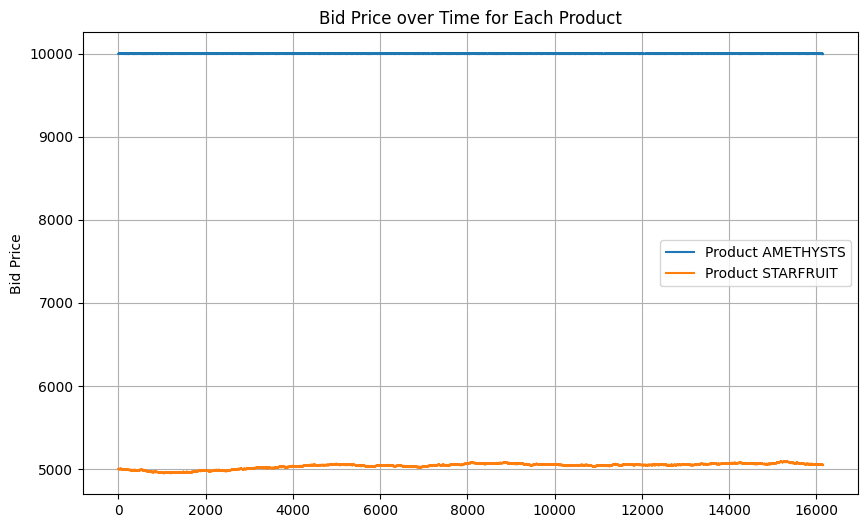

In [4]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

products = trading_data['symbol'].unique()
for product in products:
    product_data = trading_data[trading_data['symbol'] == product]
    plt.plot(product_data['price'], label=f'Product {product}')

# plt.xlabel('Timestamp')
plt.ylabel('Bid Price')
plt.title('Bid Price over Time for Each Product')
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()

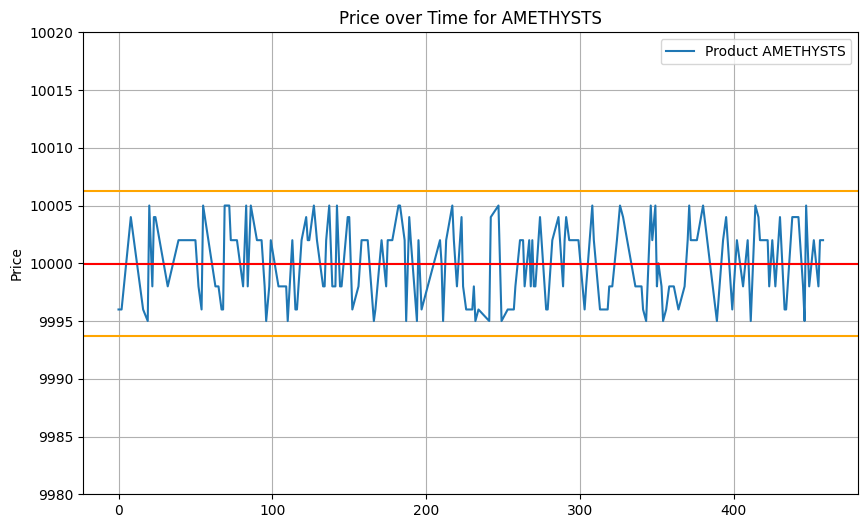

In [10]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

products = ["AMETHYSTS"]
for product in products:
    product_data = trading_data[trading_data['symbol'] == product]
    plt.plot(product_data['price'].iloc[0:200], label=f'Product {product}')

# plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price over Time for AMETHYSTS')
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.ylim(9980, 10020)

plt.axhline(y = 9999.968 , color = 'r', linestyle = '-') 
plt.axhline(y = 9993.66500086948 , color = 'orange', linestyle = '-') 
plt.axhline(y = 10006.271972178207, color = 'orange', linestyle = '-') 
plt.show()

In [6]:
amethysts_price = trading_data[trading_data["symbol"] == "AMETHYSTS"]["price"]
amethysts_price.describe()

count     7235.000000
mean      9999.968487
std          3.151743
min       9995.000000
25%       9998.000000
50%       9998.000000
75%      10002.000000
max      10005.000000
Name: price, dtype: float64

Found the price mean is 9999.968487

In [7]:
# Bollinger bands

upper_bound = amethysts_price.mean() + (2 * amethysts_price.std())
lower_bound = amethysts_price.mean() - (2 * amethysts_price.std())

print(lower_bound, upper_bound)

9993.66500086948 10006.271972178207


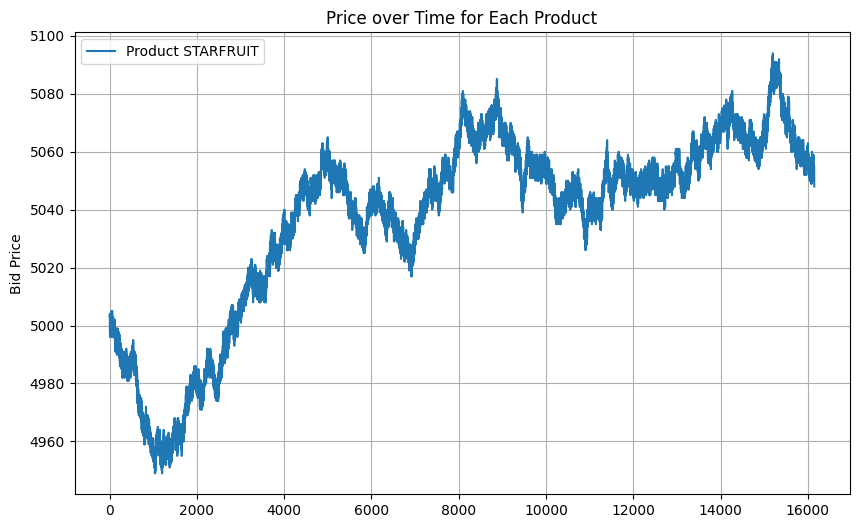

In [8]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

products = ["STARFRUIT"]
for product in products:
    product_data = trading_data[trading_data['symbol'] == product]
    plt.plot(product_data['price'], label=f'Product {product}')

# plt.xlabel('Timestamp')
plt.ylabel('Bid Price')
plt.title('Price over Time for Each Product')
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()